In [3]:
import numpy as np
import scipy as sc
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib.animation as animation
from sklearn import datasets  # to retrieve the iris Dataset
import pandas as pd  # to load the dataframe
from sklearn.preprocessing import StandardScaler  # to standardize the features
from sklearn.decomposition import PCA  # to apply PCA
import seaborn as sns  # to plot the heat maps#float32
from sklearn.decomposition import FactorAnalysis

In [4]:
# Load spike data
spike_data = np.load('../data/data_smooth_W20L50k.npy')                      
spike_data_t = spike_data[:,0:10000]
print(np.shape(spike_data))

# short time span
t = np.shape(spike_data_t)[1]
n = np.shape(spike_data)[0]

(336, 10000)


In [5]:
scalar = StandardScaler()
scaled_data = pd.DataFrame(scalar.fit_transform(spike_data_t)) #scaling the data
print(scaled_data.shape)
scaled=pd.DataFrame.to_numpy(scaled_data)

(336, 10000)


In [17]:
#Applying PCA

#Taking no. of Principal Components r
r = 20
FA = FactorAnalysis(n_components = r,random_state=0)



# X = USV'
data_pca = FA.fit_transform(scaled_data.T) # = US


c = FA.components_      # V
print(c.shape)
f = FA.n_features_in_ # S

(20, 336)


In [18]:
# Project data into low dim space 
# X_proj = U'X
# X_proj = inv(S)S'U'X
#spike__projected = np.linalg.inv(S)@data_pca.T@scaled_data

#print(spike_new_proj)
data_pca = data_pca.T
data_pca.shape

(20, 10000)

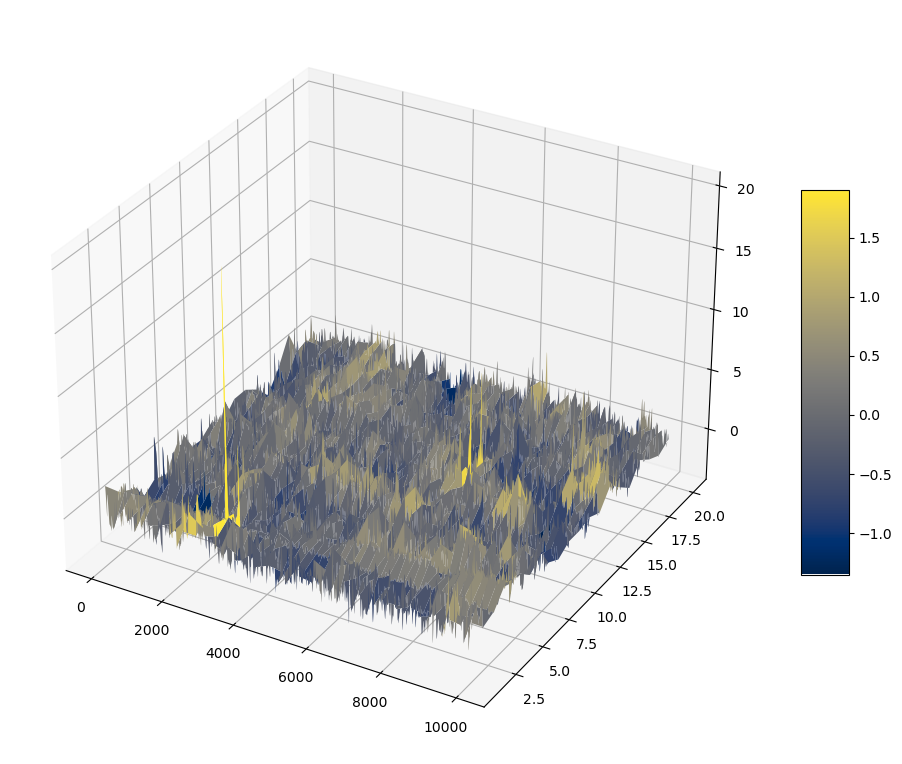

In [20]:
#spike_projected = pd.DataFrame.to_numpy(spike__projected)
dims=20
time = np.linspace(1, t, t)
d = np.linspace(1, dims, dims)
T, N = np.meshgrid(time, d)

fig = plt.figure(figsize = (12,10))
ax = plt.axes(projection='3d')

surf = ax.plot_surface(T, N, data_pca[0:dims,:], cmap = plt.cm.cividis)
# Set axes label
#ax.set_xlabel('x', labelpad=20)
#ax.set_ylabel('y', labelpad=20)
#ax.set_zlabel('z', labelpad=20)

fig.colorbar(surf, shrink=0.5, aspect=8)

plt.show()

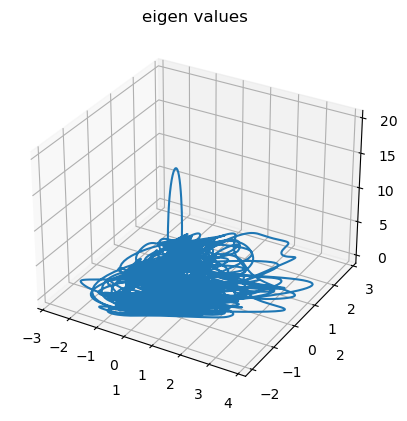

In [23]:
ax = plt.figure().add_subplot(projection='3d')
ax.plot3D(data_pca[0,:],data_pca[1,:],data_pca[2,:])

ax.set(xlabel='1', ylabel='2',
       title='eigen values')
plt.show()

TypeError: Shapes of x (200, 10000) and z (200, 336) do not match

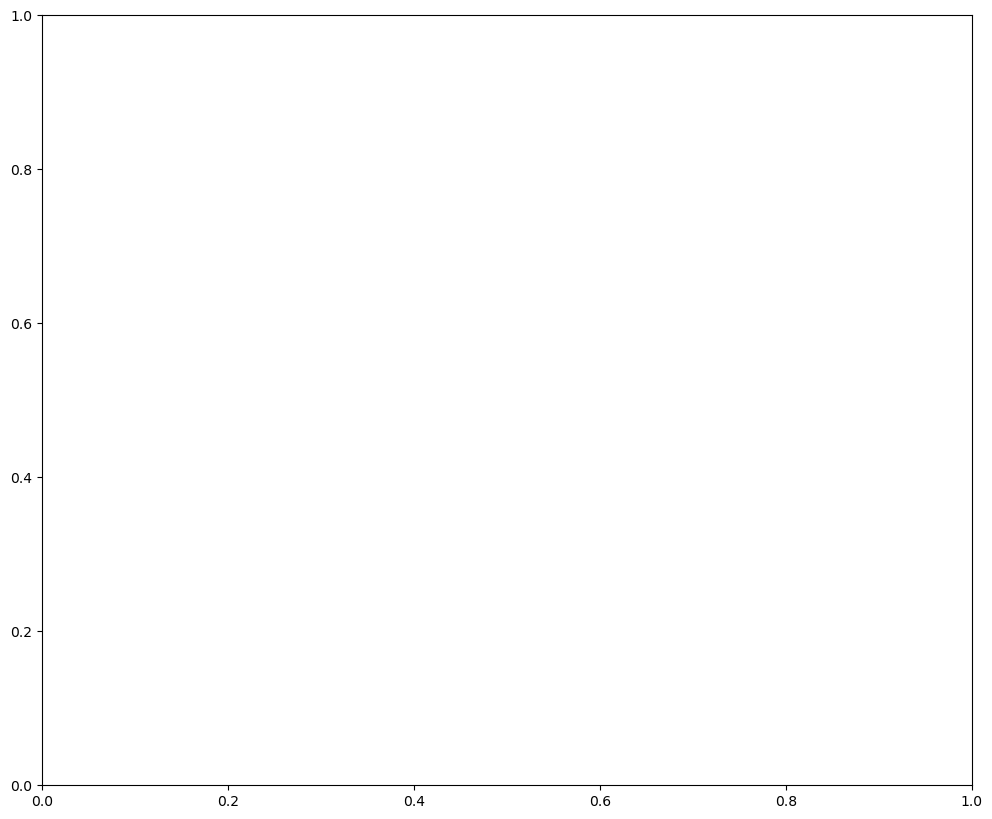

In [16]:
fig = plt.figure(figsize = (12,10))
plt.contourf(T, N, c[0:dims,:], 20, cmap='RdGy')
plt.colorbar();

TypeError: Shapes of x (100, 999) and z (100, 1000) do not match

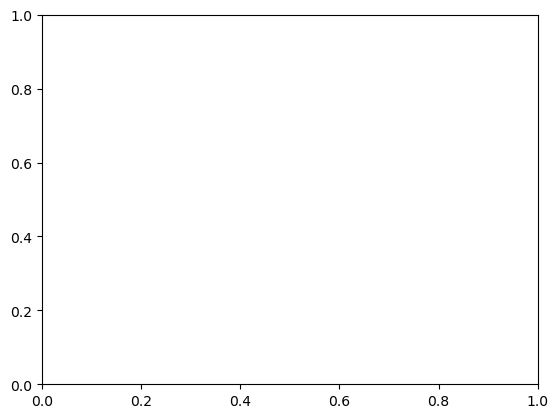

In [8]:
time = np.linspace(1, 999, 999)
neurons = np.linspace(1, 100, 100)
#print(time.shape)
#print(time)
#print(neurons.shape)
#print(neurons)
T, N = np.meshgrid(time, neurons)


plt.contourf(T, N, c[0:100,:], 20, cmap='RdGy')

In [ ]:
time = np.linspace(1, 999, 999)
neurons = np.linspace(1, 5, 5)
T, N = np.meshgrid(time, neurons)

fig = plt.figure(figsize = (12,10))
ax = plt.axes(projection='3d')

surf = ax.plot_surface(T, N, c[0:5,:], cmap = plt.cm.cividis)
# Set axes label
#ax.set_xlabel('x', labelpad=20)
#ax.set_ylabel('y', labelpad=20)
#ax.set_zlabel('z', labelpad=20)

fig.colorbar(surf, shrink=0.5, aspect=8)

plt.show()

In [ ]:
scaled = pd.DataFrame.to_numpy(scaled_data)
time = np.linspace(1, 999, 999)
neurons = np.linspace(1, 336, 336)
T, N = np.meshgrid(time, neurons)

fig = plt.figure(figsize = (12,10))
ax = plt.axes(projection='3d')

surf = ax.plot_surface(T, N, scaled, cmap = plt.cm.cividis)
# Set axes label
#ax.set_xlabel('x', labelpad=20)
#ax.set_ylabel('y', labelpad=20)
#ax.set_zlabel('z', labelpad=20)

fig.colorbar(surf, shrink=0.5, aspect=8)

plt.show()

In [ ]:
time = np.linspace(1, 999, 999)
neurons = np.linspace(1, 5, 5)
T, N = np.meshgrid(time, neurons)

fig = plt.figure(figsize = (12,10))
ax = plt.axes(projection='3d')

surf = ax.plot_surface(T, N, c[0:5,:], cmap = plt.cm.cividis)
# Set axes label
#ax.set_xlabel('x', labelpad=20)
#ax.set_ylabel('y', labelpad=20)
#ax.set_zlabel('z', labelpad=20)

fig.colorbar(surf, shrink=0.5, aspect=8)

plt.show()

In [ ]:
%matplotlib qt
dims=200
time = np.linspace(1, 999, 999)
neurons = np.linspace(1, dims, dims)
T, N = np.meshgrid(time, neurons)

fig = plt.figure(figsize = (12,10))
ax = plt.axes(projection='3d')

surf = ax.plot_surface(T, N, c[0:dims,:], cmap = plt.cm.cividis)
# Set axes label
#ax.set_xlabel('x', labelpad=20)
#ax.set_ylabel('y', labelpad=20)
#ax.set_zlabel('z', labelpad=20)

fig.colorbar(surf, shrink=0.5, aspect=8)

plt.show()